In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Carrega a imagem
img = cv2.imread('image1.jpg')

In [3]:
# Converte para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplica a limiarização
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplica a transformação morfológica de abertura
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [4]:
# Encontra as bordas das regiões
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Aplica o algoritmo de watershed
ret, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

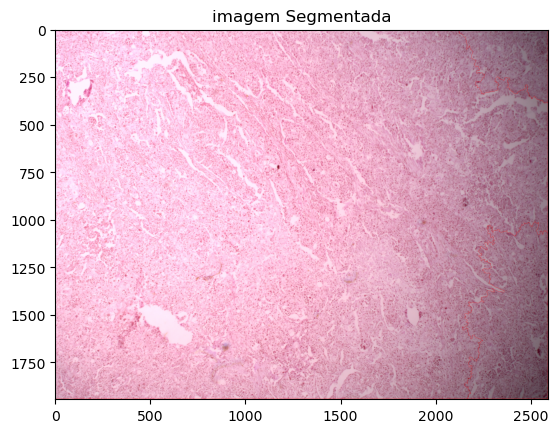

In [5]:
# Mostra a imagem segmentada
plt.title("imagem Segmentada")
plt.imshow(img)